# SUBJECT : CLASSIFICATION MODLE ON CENSUS INCOME DATA

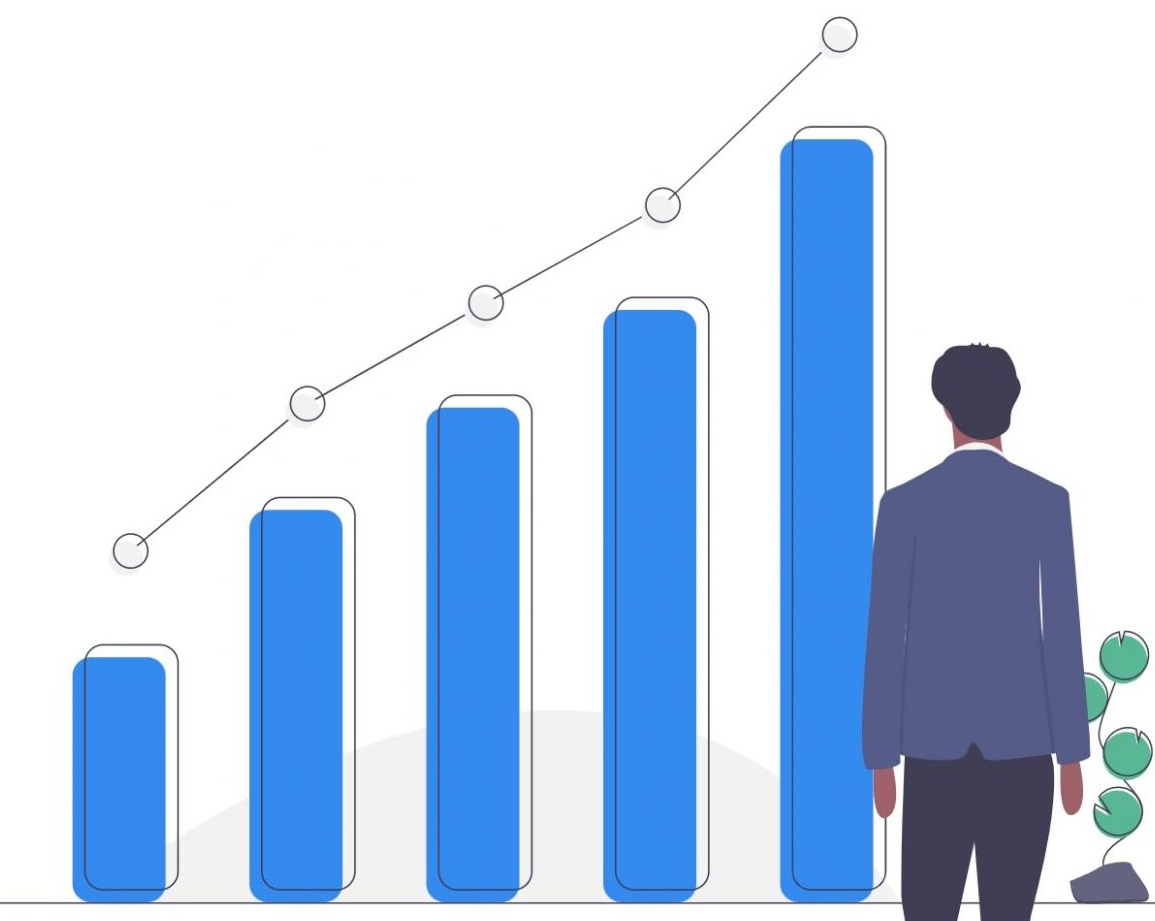

## Table Of Content :-
- Understanding the Problem Statement
- Data Collection
- Data Ingestion
- Data Cleaning
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Finding The best fit Model
- Hypertuning the Model

## About Dataset
- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## 1. Problem Statement

* We have to do the Prediction to determine whether a person makes over 50K in a year or not.

## 2. Data Collection
- Kaggle Link:- https://www.kaggle.com/datasets/uciml/adult-census-income

## 3. Data Ingestion

In [18]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Load the Dataset

df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
df.shape

(32561, 15)

## 4. Data Cleaning

In [21]:
# There are some values in the datset where data is missing and instead of NaN it has "?" value which we need to change to null.

df.replace('?',np.nan, inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
# Finding Null Values

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [23]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [24]:
# Filling the null values (For object type we will consider the Mode and Int type we will consider mean)

df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"] = df["native.country"].fillna(df["native.country"].mode()[0])

In [25]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [26]:
# Duplicated Value

df.duplicated().sum()

24

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
# to reset the index no.
df.reset_index(inplace=True,drop=True)

In [30]:
df.shape

(32537, 15)

In [31]:
# Encoding the target variable

df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [32]:
# The target variable is Income_class which has 2 categories, we are going to encode <=50K as 0 and >50K as 1

df["income"] = df["income"].map({'<=50K':0, '>50K':1})

In [33]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [34]:
df["income"].dtypes

dtype('int64')

## 5. EDA (Exploratory Data Analysis)

In [35]:
df.sample(5)  # Check any random sampling for attribution information

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16493,28,Private,292536,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,0
9082,29,Private,176683,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,1
4148,78,Private,135839,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,1086,0,20,United-States,0
27378,62,State-gov,199198,Assoc-voc,11,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
10611,40,Private,42703,Assoc-voc,11,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,0


### Attributes Information :

- **Age**: continuous.Age of the individual
- **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **Final_weight**: continuous.
- **Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **Education_level**: continuous.
- **Marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **Occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex**: Female, Male.
- **Capital_gain**: continuous.
- **Capital_loss**: continuous.
- **Hours_per_week**: continuous.
- **Native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **Income_class**:<=50K as 0 and >50K as 1

In [36]:
# shape & info
df.shape

(32537, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [38]:
# Separating Nemerical and Categorical Value

num_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("We have {} numerical features : {}".format((len(num_feature)),num_feature))
print("We have {} categorical features : {}".format((len(cat_feature)),cat_feature))

We have 7 numerical features : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
We have 8 categorical features : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [39]:
# Statistical description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0
income,32537.0,0.240926,0.427652,0.0,0.0,0.0,0.0,1.0


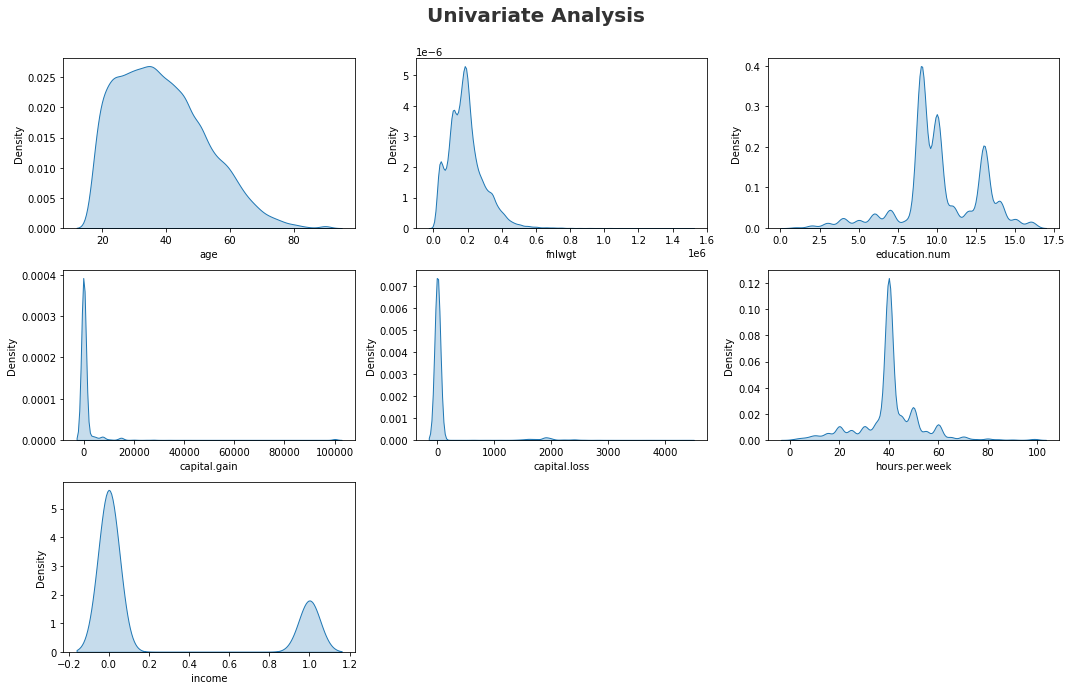

In [40]:
# Univariate Analysis with Kernal Density Estimation

plt.figure(figsize= (15,15))
plt.suptitle("Univariate Analysis", fontsize = 20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(num_feature)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x = df[num_feature[i]], shade=True)
    plt.xlabel(num_feature[i])
    plt.tight_layout()

### Observation :
- Age is aprroximately normally distributed.
- Final weight,capital loss & capital gain are heavily right skewed.

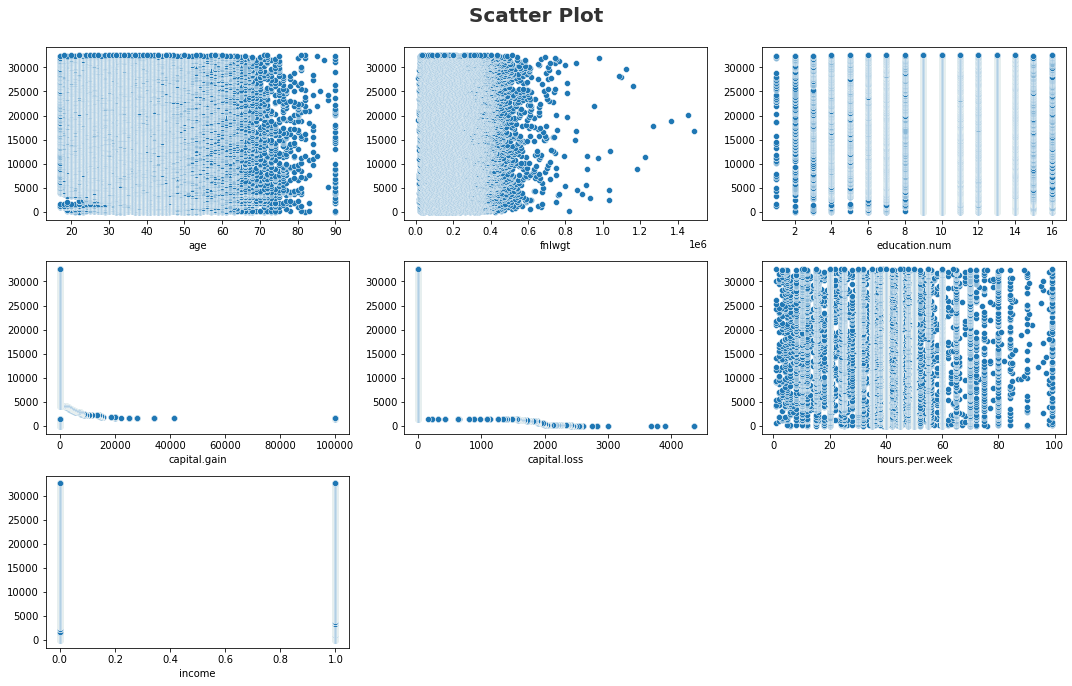

In [41]:
# Scatter plot for Numerical Variable

plt.figure(figsize= (15,15))
plt.suptitle("Scatter Plot", fontsize = 20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(num_feature)):
    plt.subplot(5,3, i+1)
    sns.scatterplot(x = num_feature[i], y = df.index, data = df)
    plt.xlabel(num_feature[i])
    plt.tight_layout()

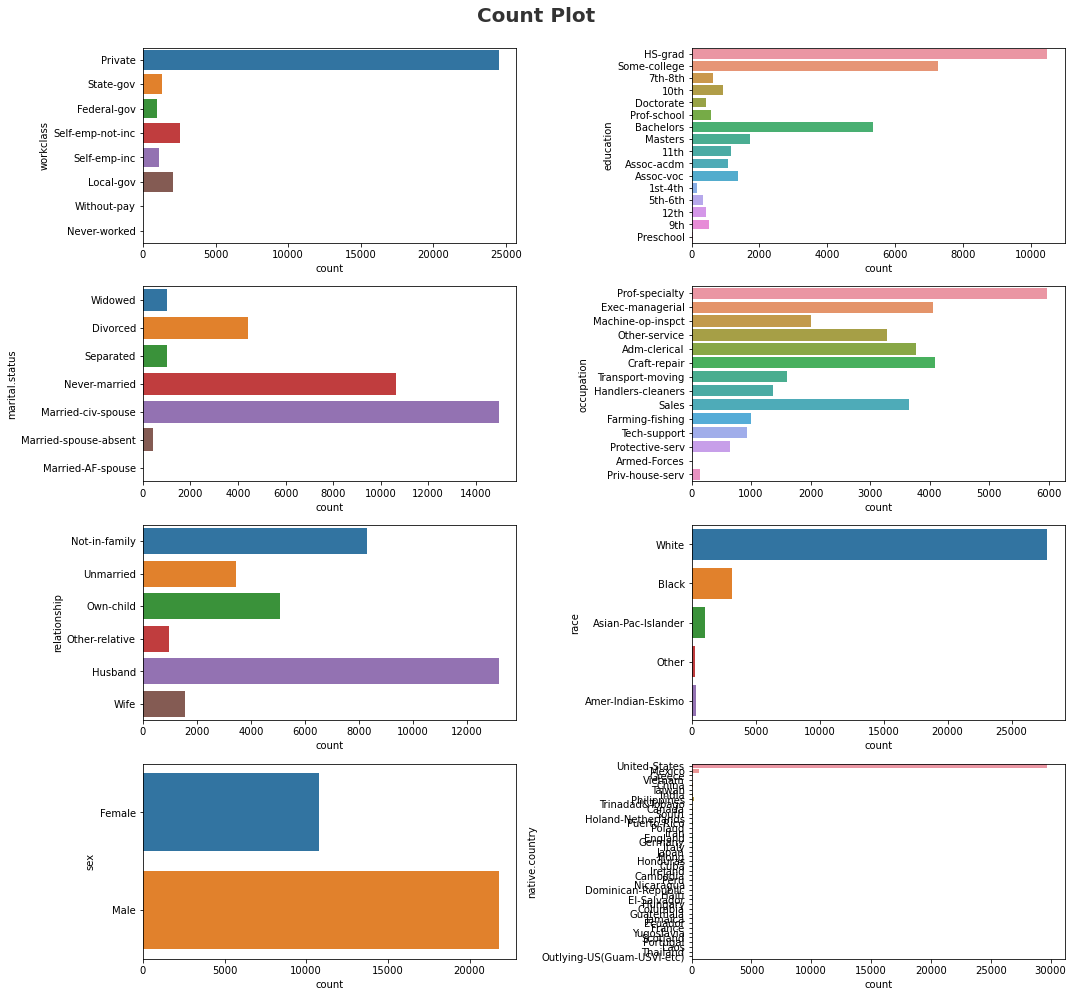

In [42]:
# Count Plot for Categorical Feature

plt.figure(figsize= (15,20))
plt.suptitle("Count Plot", fontsize = 20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(cat_feature)):
    plt.subplot(6,2, i+1)
    sns.countplot(y = cat_feature[i],data = df)
    plt.tight_layout()

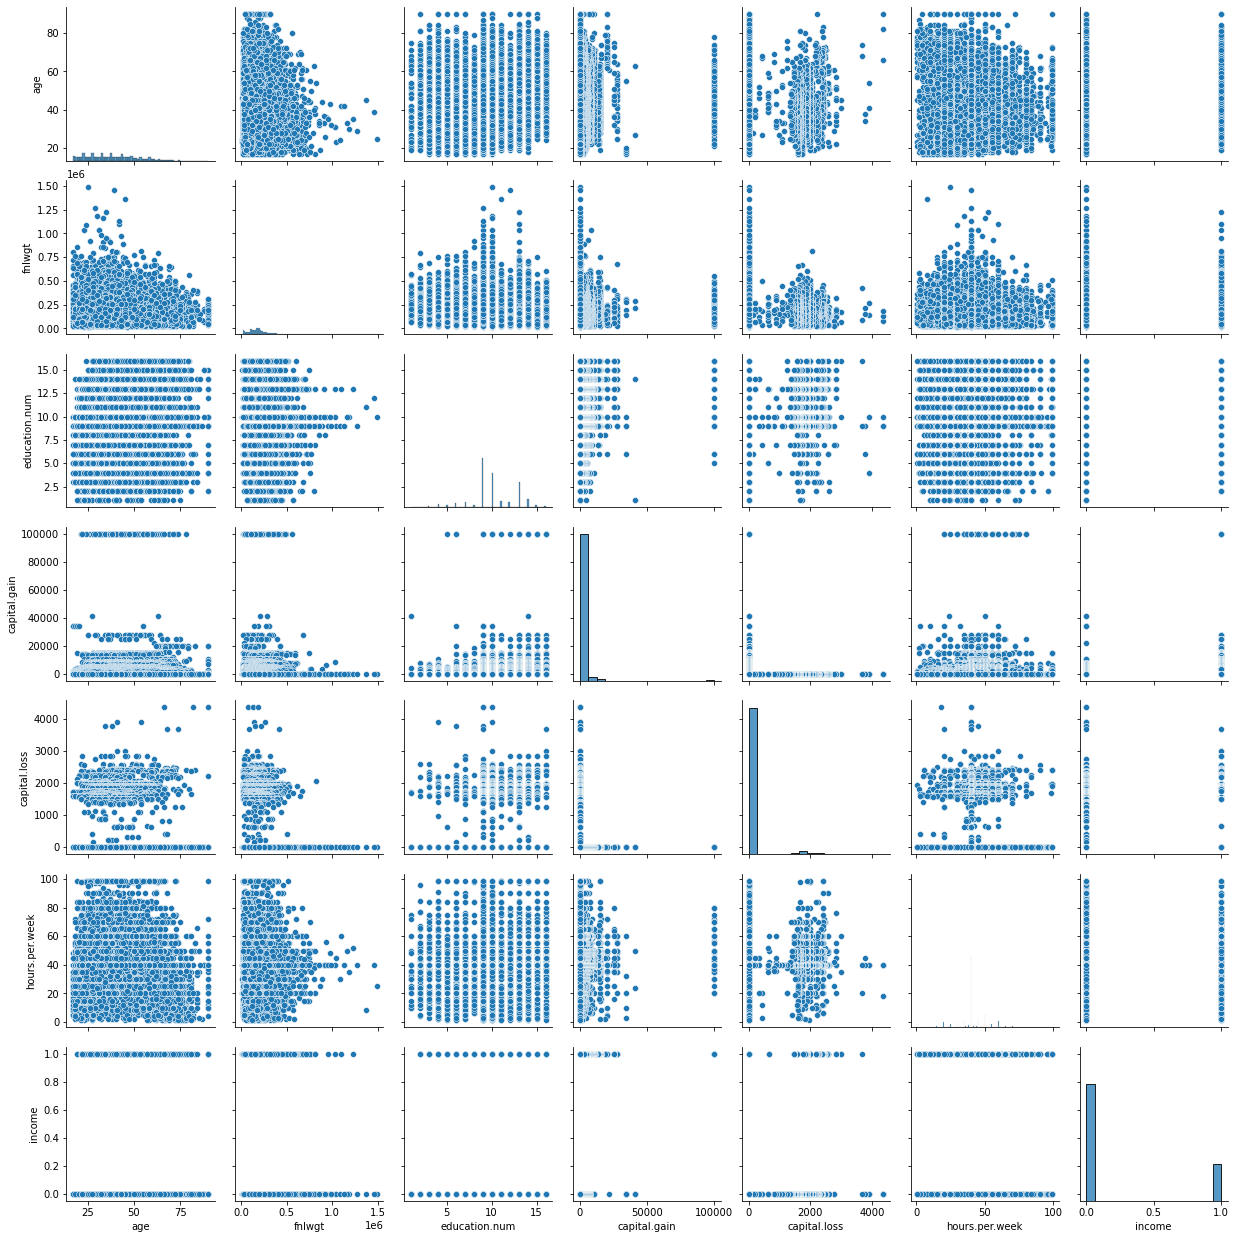

In [43]:
# Bivariate Analysis

sns.pairplot(df)

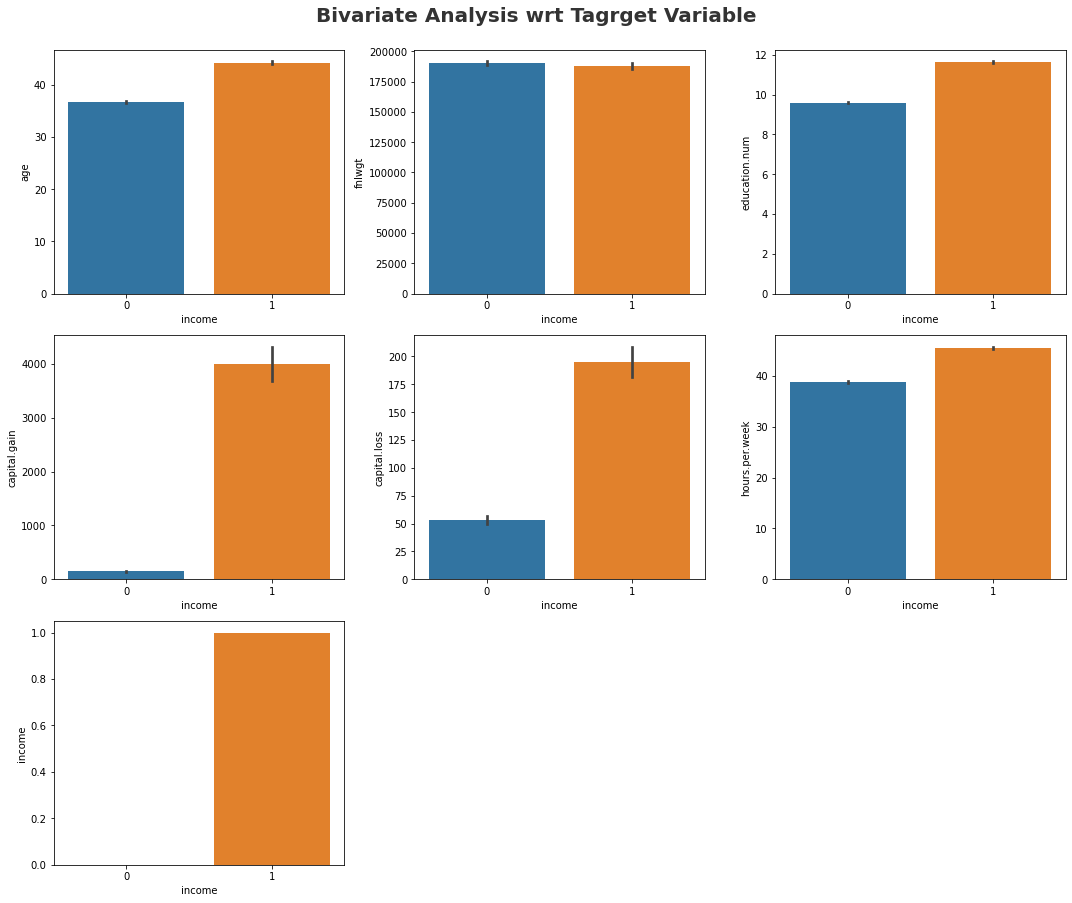

In [44]:
# Bivariate Analysis with respect to Target Variable

plt.figure(figsize= (15,20))
plt.suptitle("Bivariate Analysis wrt Tagrget Variable", fontsize = 20, fontweight='bold',alpha=0.8, y=1)

for i in range(0, len(num_feature)):
    plt.subplot(5,3, i+1)
    sns.barplot(y = num_feature[i], x = df['income'],data = df)
    plt.tight_layout()

In [45]:
# Correlation
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


<AxesSubplot:>

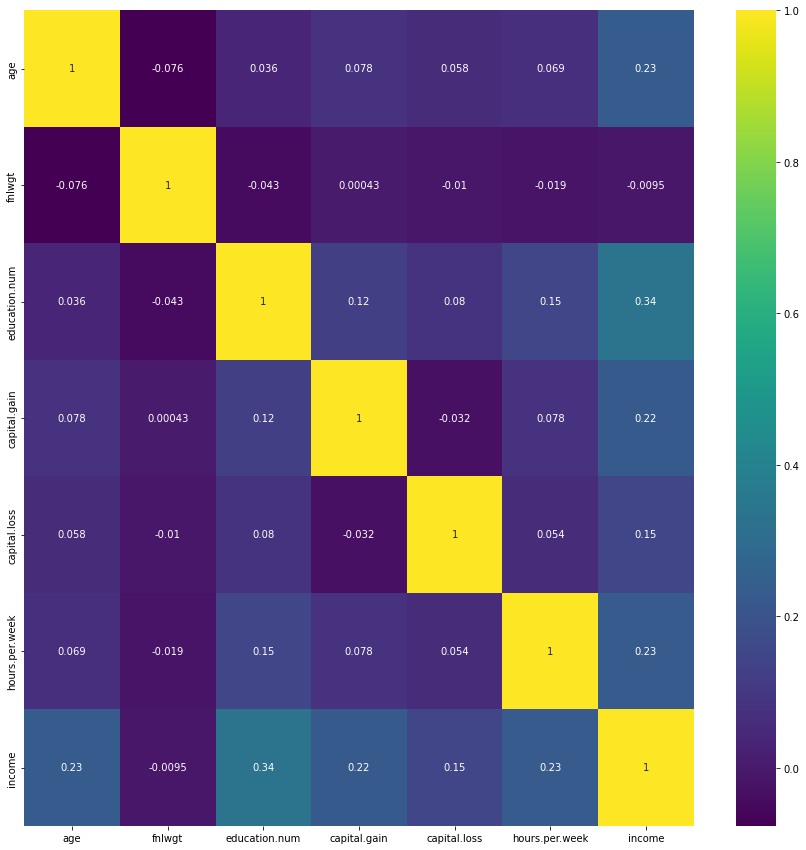

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap= 'viridis')

### Observation:

- There is very low correlation between the features , which shows that there is less to no multicollinearity in the dataset.
- Final_weight has lowest correlation with rest of the Features.
- The highest Correlation is between Education_level and Income_Class equal to 0.33

<AxesSubplot:xlabel='sex', ylabel='hours.per.week'>

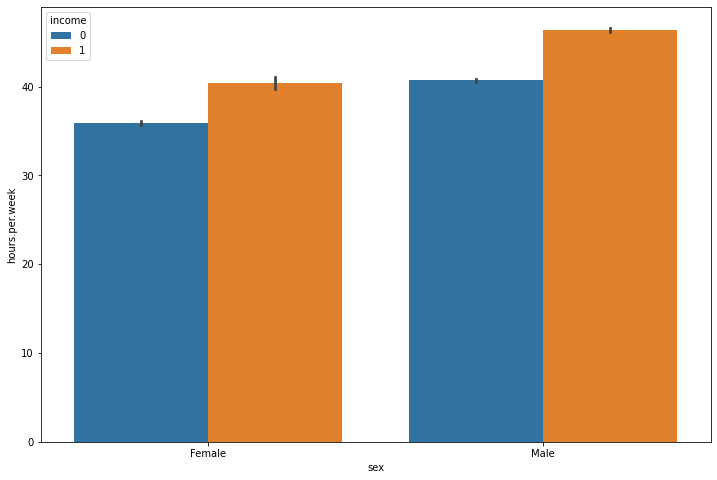

In [47]:
# Relation between Individual's Sex and Hours_per_week

plt.figure(figsize=(12,8))
sns.barplot(x = 'sex', y = 'hours.per.week', data = df, hue = 'income')

### Observation:

- Males work for more hours per week than Females


<AxesSubplot:xlabel='income', ylabel='count'>

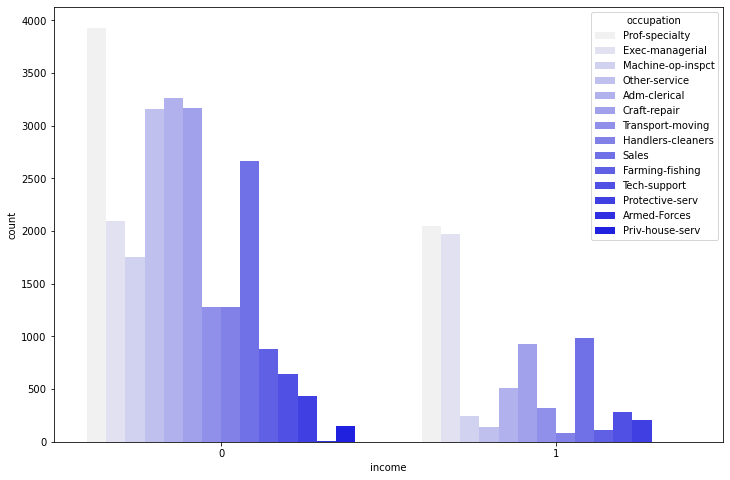

In [48]:
# Income based Occupation

plt.figure(figsize=(12,8))
sns.countplot(x='income', hue='occupation', data=df, color='b')

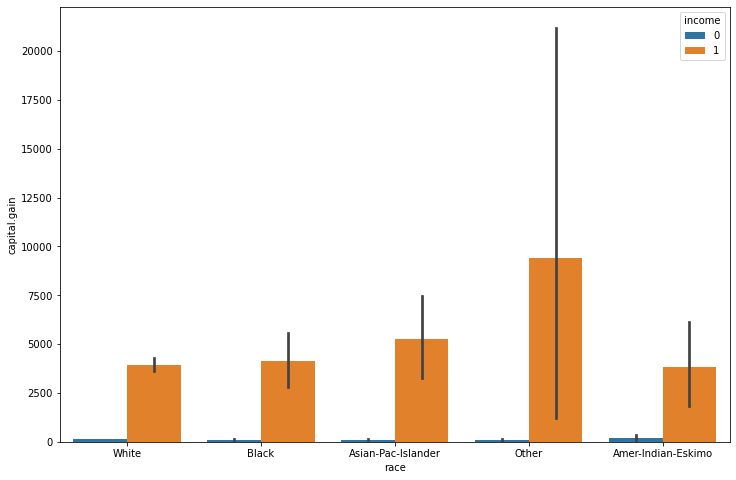

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x='race', y='capital.gain', data=df, hue='income');

### observation:

- Asian-Pac-Islander have gain more capital followed by Black, white and than India



<AxesSubplot:xlabel='workclass', ylabel='count'>

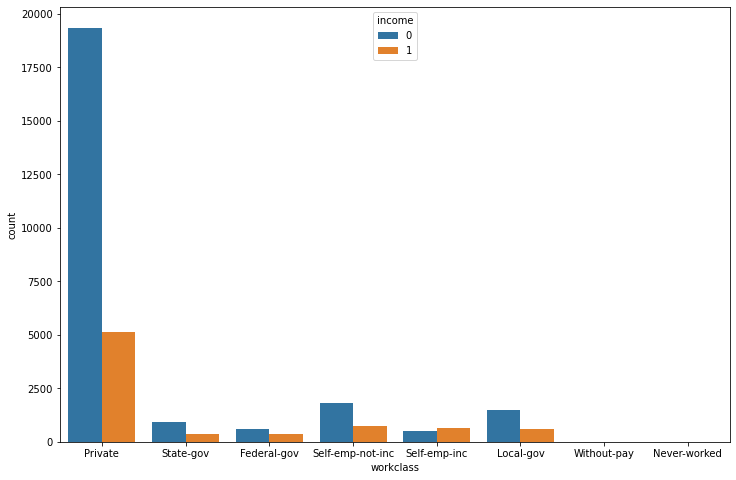

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='workclass', hue='income')

### Observation :

- There are more Private employees getting income more than 50k followed by self employed

<AxesSubplot:xlabel='marital.status', ylabel='count'>

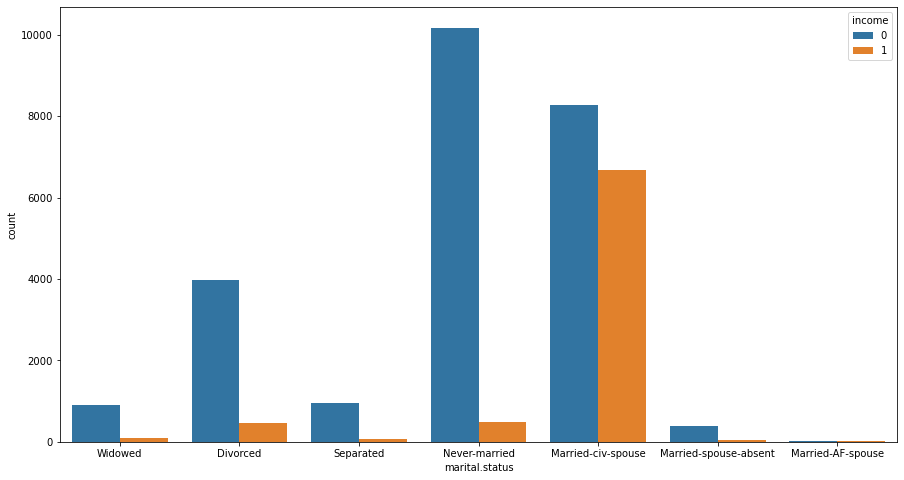

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(x='marital.status', hue='income', data=df, )

### Observation :

- More no. of married person have income above 50K than others.
- Maximum never married person have income less than 50K.

In [52]:
df['income'].unique()

array([0, 1], dtype=int64)

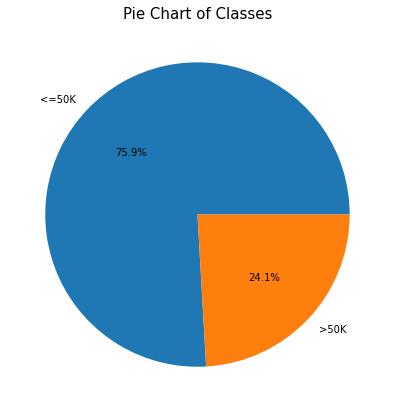

In [53]:
# Income class

percentage=df.income.value_counts(normalize=True)*100
classes_labels=['<=50K','>50K']
plt.figure(figsize=(7,7))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

### Observation :

- More than 75% of people have income less than or equal to 50K.

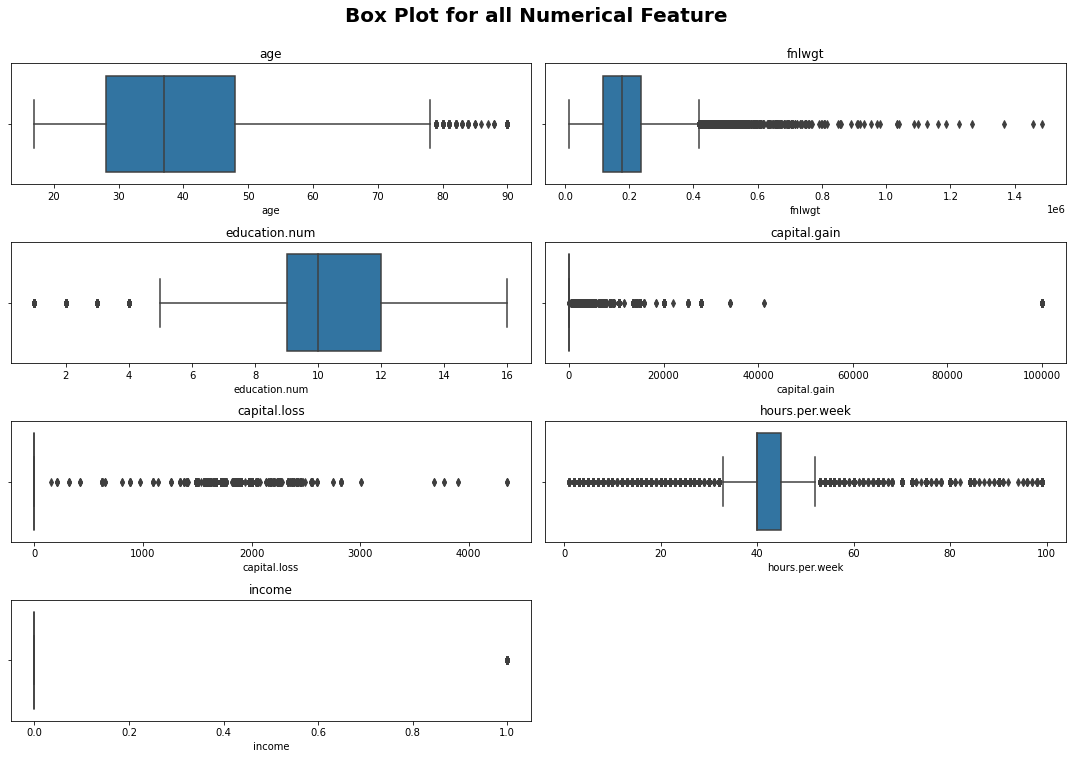

In [54]:
# Outliers for Numerical Feature

plt.figure(figsize=(15,20))
plt.suptitle("Box Plot for all Numerical Feature", fontsize= 20, fontweight = 'bold', y = 1)

for i in range(0, len(num_feature)):
  plt.subplot(8,2, i+1)
  sns.boxplot(x= df[num_feature[i]])
  plt.title(label = num_feature[i])
  plt.tight_layout()


## 6. Data Preprocessing

In [55]:
# Label encoding on the categorical features

from sklearn.preprocessing import LabelEncoder
for feature in df.columns:
  if df[feature].dtypes == 'object':
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])

In [56]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [57]:
# Input and Output Features

x = df.drop(['income'], axis = 1)
y = df.income

In [58]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38


In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [60]:
# Splitting The Training and Testing Data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26029, 14), (6508, 14), (26029,), (6508,))

In [62]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
def scaler_standard(X_train,X_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled

In [63]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [64]:
X_train_scaled

array([[-0.04333915, -0.08377514, -0.32415654, ..., -0.21587484,
        -0.04041189,  0.26149005],
       [ 0.7651058 , -0.08377514, -1.49703235, ..., -0.21587484,
         4.7239815 ,  0.26149005],
       [-0.26382413, -0.08377514, -0.14302836, ..., -0.21587484,
        -0.04041189,  0.26149005],
       ...,
       [-0.41081412, -0.08377514, -1.44229726, ..., -0.21587484,
        -0.04041189,  0.26149005],
       [ 0.61811581, -0.08377514,  1.58507427, ..., -0.21587484,
        -0.04041189,  0.26149005],
       [ 2.08801571,  1.73035384,  0.74144001, ..., -0.21587484,
        -0.04041189,  0.26149005]])

In [65]:
X_test_scaled

array([[ 0.6916108 , -1.89790411,  0.46233451, ..., -0.21587484,
        -0.04041189,  0.26149005],
       [ 0.17714584, -0.08377514, -0.46382733, ..., -0.21587484,
        -0.04041189,  0.26149005],
       [ 0.91209579, -0.08377514, -0.85763475, ..., -0.21587484,
         1.57463672,  0.26149005],
       ...,
       [ 1.64704574,  1.73035384, -0.52914869, ..., -0.21587484,
         1.81689401, -0.39904561],
       [-1.43974405, -0.08377514, -0.19527033, ..., -0.21587484,
        -2.46298481,  0.26149005],
       [-1.21925907, -0.08377514,  2.46400869, ..., -0.21587484,
        -0.04041189,  0.26149005]])

In [66]:
# VIF after Scaling
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X_train.columns
#let's check the values
vif

,vif,Features
0,1.159602,age
1,1.009819,workclass
2,1.013688,fnlwgt
3,1.164090,education
4,1.220867,education.num
5,1.129520,marital.status
6,1.016378,occupation
7,1.685276,relationship
8,1.032043,race
9,1.559726,sex


## 7. Model Training

### 7.a) Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [68]:
# Saving the model in a pickle file

import pickle
with open('LogisticModelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)

In [69]:
# Prediction

y_predict_lr = log_reg.predict(X_test_scaled)
y_predict_lr

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
# Performance Metrics
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix, roc_auc_score, classification_report
accuracy_lr = accuracy_score(y_test,y_predict_lr)
accuracy_lr

0.8295943454210203

In [71]:
# Confusion matrix and Classification Report

loreg = LogisticRegression(max_iter=100)
loreg.fit(X_train_scaled,y_train)
loreg_predict = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_predict)
cr = classification_report(y_test,loreg_predict)

print("Logistic Regression")
print("Accuracy Score: {:.4f}".format(score))
print(cr)

Logistic Regression
Accuracy Score: 0.8296
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4964
           1       0.72      0.46      0.56      1544

    accuracy                           0.83      6508
   macro avg       0.79      0.70      0.73      6508
weighted avg       0.82      0.83      0.82      6508



In [72]:
loreg_cm = confusion_matrix(y_test, loreg_predict)
loreg_cm

array([[4692,  272],
       [ 837,  707]], dtype=int64)

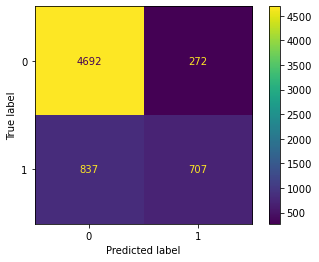

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = loreg_cm)
disp.plot()

In [74]:
# Area under Curve

auc_lr = roc_auc_score(y_test,loreg_predict)
auc_lr

0.7015535169281

In [75]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test,loreg_predict)

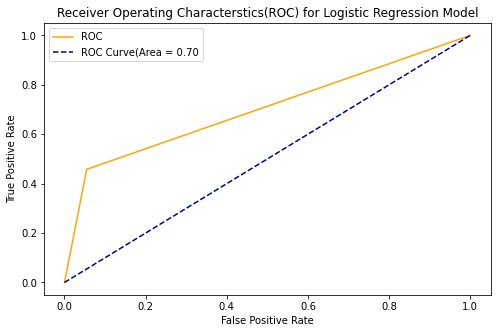

In [76]:
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], "k--", color="darkblue",label = "ROC Curve(Area = 0.70")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics(ROC) for Logistic Regression Model")
plt.legend()
plt.show()

### 7.b) SVC Model

In [77]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

In [78]:
# Saving the SVC Model in a pickle file
import pickle
with open('SVCmodelForPrediction.sav', 'wb') as f:
    pickle.dump(svc_model,f)

In [79]:
# Prediction
y_predict_svc = svc_model.predict(X_test_scaled)
y_predict_svc

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
# Accuracy Score
accuracy_svc = accuracy_score(y_test, y_predict_svc)
accuracy_svc

0.8517209588199139

In [81]:
# Classification report
cr_svc = classification_report(y_test, y_predict_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4964
           1       0.75      0.56      0.64      1544

    accuracy                           0.85      6508
   macro avg       0.81      0.75      0.77      6508
weighted avg       0.84      0.85      0.84      6508



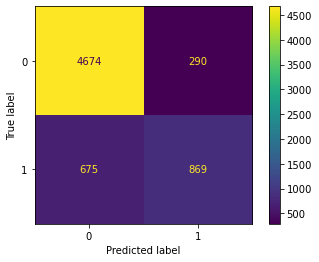

In [82]:
# Confusion Metrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_for_svc = confusion_matrix(y_test,y_predict_svc)
svc_cm = ConfusionMatrixDisplay(confusion_matrix = cm_for_svc)
svc_cm.plot()

In [83]:
# Area under curve

auc_svc = roc_auc_score(y_test,y_predict_svc)
auc_svc

0.7522016028357541

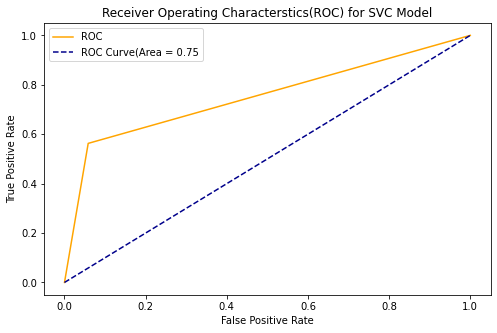

In [84]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test,y_predict_svc)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], "k--", color="darkblue",label = "ROC Curve(Area = 0.75")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics(ROC) for SVC Model")
plt.legend()
plt.show()

### 7.c) Decission Tree Classifier Model

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [86]:
# Prediction

y_predict_dt = dt_model.predict(X_test_scaled)

In [87]:
# Saving the DT Model in a pickle file
import pickle
with open('DecisionTreeClassifierForPrediction.sav', 'wb') as f:
    pickle.dump(y_predict_dt,f)

In [88]:
# Accuracy Score
accuracy_dt = accuracy_score(y_test,y_predict_dt)
accuracy_dt

0.810540872771973

In [89]:
# Classification Report

cr_dt = classification_report(y_test,y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4964
           1       0.60      0.62      0.61      1544

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.74      6508
weighted avg       0.81      0.81      0.81      6508



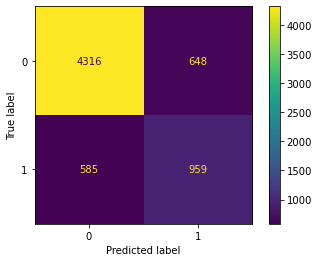

In [90]:
# confucion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm_for_dt = confusion_matrix(y_test,y_predict_dt)
svc_dt = ConfusionMatrixDisplay(confusion_matrix = cm_for_dt)
svc_dt.plot()

In [91]:
# Area under curve

auc_dt = roc_auc_score(y_test,y_predict_dt)
auc_dt

0.7452870512247769

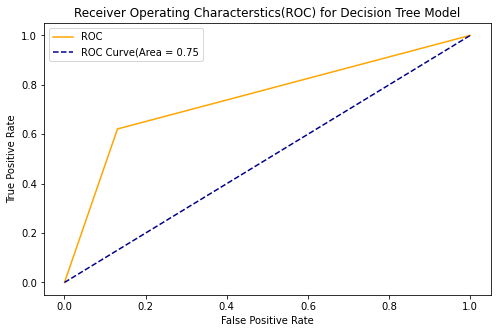

In [92]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test,y_predict_dt)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], "k--", color="darkblue",label = "ROC Curve(Area = 0.75")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics(ROC) for Decision Tree Model")
plt.legend()
plt.show()

## Final Report

In [93]:
# Final report of all model w.r.t score

a = [accuracy_lr,accuracy_svc,accuracy_dt]
b = [auc_lr,auc_svc,auc_dt]
c = ["Logistic Regression", "Support Vector Classifier", "Decision Tree"]

for i in range(0,len(c)):
    print("The accuracy of", c[i], "is :-", a[i],"and the area under curve is :-", b[i])

The accuracy of Logistic Regression is :- 0.8295943454210203 and the area under curve is :- 0.7015535169281
The accuracy of Support Vector Classifier is :- 0.8517209588199139 and the area under curve is :- 0.7522016028357541
The accuracy of Decision Tree is :- 0.810540872771973 and the area under curve is :- 0.7452870512247769


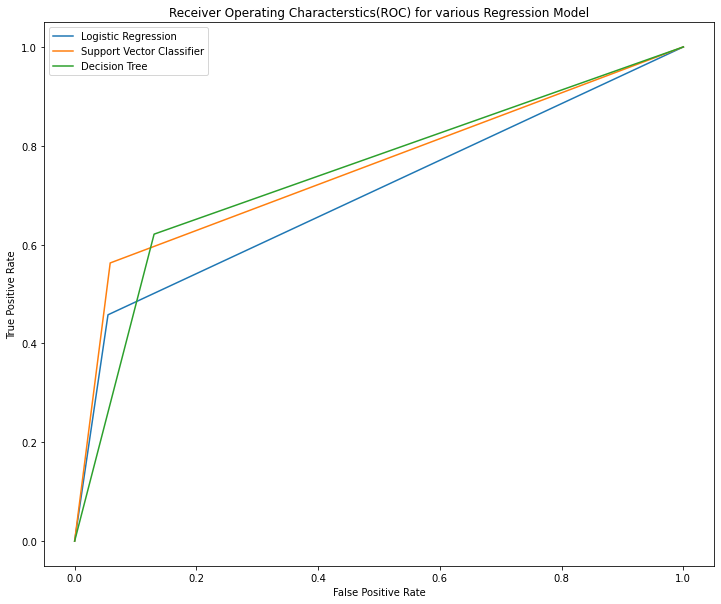

In [94]:
# # ROC Curve for all 03 model to check the best fit model

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_predict_lr)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_predict_svc)
fpr3, tpr3, thresholds3 = roc_curve(y_test,y_predict_dt)
plt.figure(figsize=(12,10))
plt.plot(fpr1,tpr1, label = 'Logistic Regression')
plt.plot(fpr2,tpr2, label = 'Support Vector Classifier')
plt.plot(fpr3,tpr3, label = 'Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics(ROC) for various Regression Model")
plt.legend()
plt.show()

### **Conclusion :** 
As in the above chart we can see that SVC model is the best as it has the highest accuracy and also has the highest area under curve. So we choose this model and apply hyper parameter tunning to this model to further increase in its accuracy.


# 8. Hyper Parameter Tuning

In [95]:
# parameters

from sklearn.model_selection import GridSearchCV
#parameters
param= {'C':[1,2,10,100],'gamma':[0.1,0.5,1]}
grid_svc= GridSearchCV(svc_model, param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train_scaled,y_train)

In [96]:
grid_serach.best_params_

In [97]:
# we have found the best parameter ater Hyper parameter tuning as {'C': 2, 'gamma': 0.1}. Now we will fit in to SVC Model

In [98]:
# Creating SVC model with best parameter

svc_model_hyp = SVC(kernel = 'rbf', C = 2.0, gamma = 0.1)
svc_model_hyp.fit(X_train_scaled,y_train)

SVC(C=2.0, gamma=0.1)

In [99]:
# New predictions

y_predict_svc_hyp = svc_model_hyp.predict(X_test_scaled)
y_predict_svc_hyp

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [100]:
# Accuracy

accuracy_svc_hyp = accuracy_score(y_predict_svc_hyp,y_test)
accuracy_svc_hyp

0.8531038721573448

In [101]:
# Classification Report

cr_svc_hyp = classification_report(y_predict_svc_hyp,y_test)
print(cr_svc_hyp)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5330
           1       0.57      0.75      0.65      1178

    accuracy                           0.85      6508
   macro avg       0.76      0.81      0.78      6508
weighted avg       0.87      0.85      0.86      6508



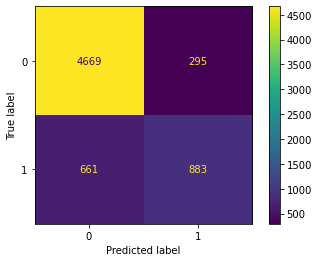

In [102]:
# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
svc_cm_hyp = confusion_matrix(y_test, y_predict_svc_hyp)
svc_cmd_hyp = ConfusionMatrixDisplay(confusion_matrix = svc_cm_hyp)
svc_cmd_hyp.plot()

In [103]:
# Area Under curve

auc_svc_hyp = roc_auc_score(y_test, y_predict_svc_hyp)
auc_svc_hyp

0.7562316554842535

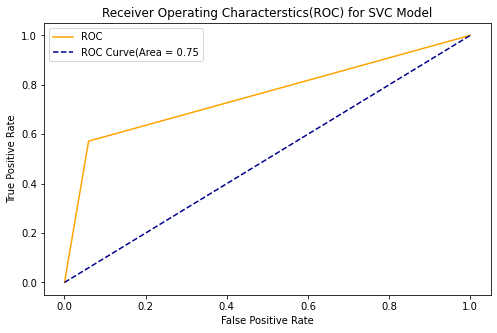

In [104]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test,y_predict_svc_hyp)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], "k--", color="darkblue",label = "ROC Curve(Area = 0.75")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics(ROC) for SVC Model")
plt.legend()
plt.show()

In [105]:
# Check the Difference betwwen the SVC Model with the SVC Hypertuning Model
df  = pd.DataFrame()
df["Score"] = ['Accuracy Score', 'AUC_Score']
df["SVC model"] = [accuracy_svc, auc_svc]
df["SVC Model_HYP"] = [accuracy_svc_hyp, auc_svc_hyp]
df.head()

,Score,SVC model,SVC Model_HYP
0,Accuracy Score,0.851721,0.853104
1,AUC_Score,0.752202,0.756232


In [106]:
# Conclusion: 
# Using GridSearchCV we are able to hypertune the SVC model and Increase Accuracy and Area under curve.

In [107]:
# Saving the final Model

import pickle
# Writing different model files to file
with open( 'Hypertuned_svc_modelForPrediction.sav', 'wb') as f:
    pickle.dump(svc_model_hyp,f)

### **Thank You**
Performed By: Pravas